The vibrance of a photograph

Splitting the image into hue, saturation, and value planes

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Load the original grayscale image
original_image = cv.imread("E:/GitHub_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/spider.png")
assert original_image is not None
image_hsv = cv.cvtColor(original_image, cv.COLOR_BGR2HSV)

# Split into hue, saturation, and value components
hue, saturation, value = cv.split(image_hsv)

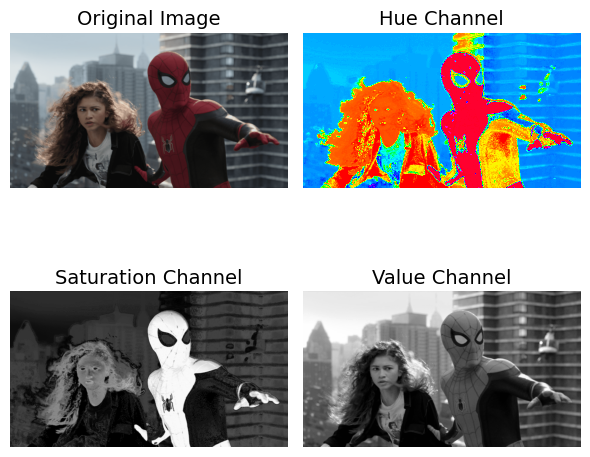

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the original image (make sure the path is correct)
original_image = cv.imread("E:/GitHub_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/spider.png")
assert original_image is not None, "Image not found."

# Convert the image from BGR to HSV color space
image_hsv = cv.cvtColor(original_image, cv.COLOR_BGR2HSV)

# Split the HSV image into its three components
hue, saturation, value = cv.split(image_hsv)

# Create subplots to display the images
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

# Plot the original image
axs[0, 0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image', fontsize=14)
axs[0, 0].axis('off')  # Hide axes for clarity

# Plot the Hue channel
axs[0, 1].imshow(hue, cmap='hsv')
axs[0, 1].set_title('Hue Channel', fontsize=14)
axs[0, 1].axis('off')

# Plot the Saturation channel
axs[1, 0].imshow(saturation, cmap='gray')
axs[1, 0].set_title('Saturation Channel', fontsize=14)
axs[1, 0].axis('off')

# Plot the Value channel
axs[1, 1].imshow(value, cmap='gray')
axs[1, 1].set_title('Value Channel', fontsize=14)
axs[1, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


##### Apply intensity transformation to the saturation plane.

In [15]:
# Define the intensity transformation function
def apply_intensity_transformation(pixel_values, scaling_factor=0.6, sigma=70):

    #Modify pixel intensity using a Gaussian-based transformation.

    adjustment = scaling_factor * (128 * np.exp(-((pixel_values - 128) ** 2) / (2 * sigma ** 2)))
    transformed_values = np.minimum(pixel_values + adjustment, 255)
    return transformed_values

# Execute the transformation on the saturation channel
transformed_saturation = apply_intensity_transformation(saturation, scaling_factor=0.6).astype(np.uint8)


##### Adjust alpha to get a visually pleasing output

In [16]:
from ipywidgets import interact, FloatSlider

# Function to update the image based on alpha (interactive)
def adjust_final_image(alpha):
    # Apply the intensity transformation to the saturation plane
    saturation_transformed = apply_intensity_transformation(saturation, scaling_factor=alpha).astype(np.uint8)

    # Merge the transformed saturation with the original hue and value channels
    hsv_transformed = cv.merge([hue, saturation_transformed, value])

    # Convert back to BGR format for display
    final_image_bgr = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2BGR)

    # Display the final transformed image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv.cvtColor(final_image_bgr, cv.COLOR_BGR2RGB))  # Convert to RGB for matplotlib display
    plt.title(f'Final Image with Transformed Saturation (alpha={alpha:.2f})')
    plt.axis('off')
    plt.show()

# Create an interactive slider for alpha
interact(adjust_final_image, alpha=FloatSlider(value=0.5, min=0, max=1, step=0.05, description='Alpha:'))


interactive(children=(FloatSlider(value=0.5, description='Alpha:', max=1.0, step=0.05), Output()), _dom_classe…

<function __main__.adjust_final_image(alpha)>

In [25]:
# Execute the transformation on the saturation channel
transformed_saturation = apply_intensity_transformation(saturation, scaling_factor=0.45).astype(np.uint8)

# Recombine the hue, saturation (transformed), and value planes into an HSV image
image_hsv_transformed = cv.merge([hue, transformed_saturation, value])

# Convert the HSV image back to BGR for display
image_transformed = cv.cvtColor(image_hsv_transformed, cv.COLOR_HSV2BGR)
# Convert original and transformed images from BGR to RGB for matplotlib display
image_rgb = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)
image_transformed_rgb = cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB)


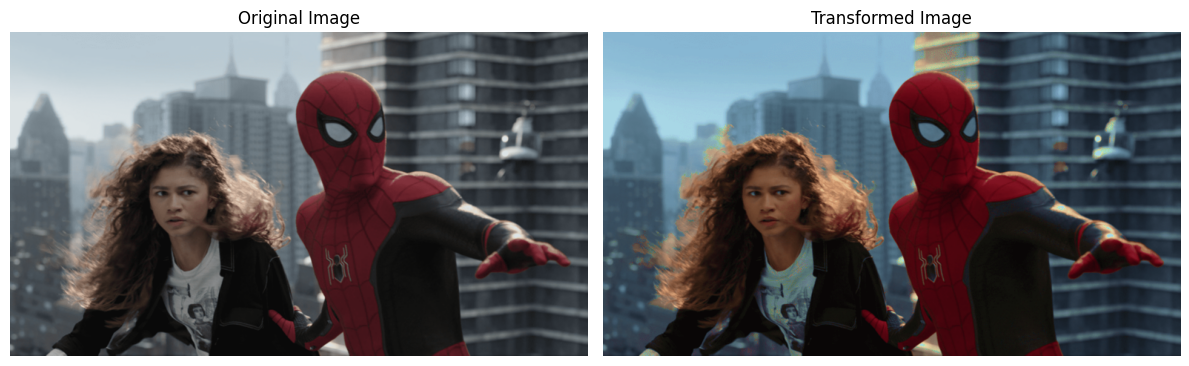

In [26]:
import matplotlib.pyplot as plt
import cv2 as cv

# Function to plot original and transformed images
def plot_images(original, transformed):
    # Create a figure with 1 row and 2 columns
    plt.figure(figsize=(12, 6))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')  # Hide axis for a cleaner look

    # Plot the transformed image
    plt.subplot(1, 2, 2)
    plt.imshow(transformed)
    plt.title('Transformed Image')
    plt.axis('off')

    # Show the figure
    plt.tight_layout()
    plt.show()

# Plot the original and transformed images
plot_images(image_rgb, image_transformed_rgb)
